<a href="https://colab.research.google.com/github/oak2905/ae/blob/main/aeproj_bvar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data = pd.read_csv('/content/drive/MyDrive/ae/data_f.csv')
data

,Date,World_oil_prod,Real_price_oil,glob_eco_act,usdinr,usdyen,usdyuan,wui,china_gdp,india_gdp,japan_gdp
0,2002q1,58288.87743,19.190000,88.685133,48.612267,132.462300,8.277033,22597.36,3.176680e+11,2.208680e+11,3.614990e+12
1,2002q2,58037.14403,23.956667,90.054700,48.979800,126.812433,8.276967,17938.45,3.527010e+11,2.219220e+11,3.873500e+12
2,2002q3,58477.81643,25.936667,90.610367,48.621733,119.323267,8.276833,14136.45,3.776180e+11,2.215830e+11,4.100360e+12
3,2002q4,60047.26377,25.450000,90.563867,48.274333,122.469500,8.277367,27832.88,4.224740e+11,2.207090e+11,4.111520e+12
4,2003q1,62571.27620,30.586667,91.130533,47.793733,118.946100,8.277600,25718.62,3.603200e+11,2.248930e+11,4.114920e+12
...,...,...,...,...,...,...,...,...,...,...,...
79,2021q4,63466.87490,73.590000,100.795867,74.930600,113.639800,6.391800,19802.65,5.027450e+12,5.177110e+11,4.804880e+12
80,2022q1,64271.99503,89.630000,101.725767,75.188867,116.226400,6.347933,26455.02,4.154440e+12,5.250090e+11,4.919140e+12
81,2022q2,63778.23137,107.180000,102.752833,77.185067,129.728267,6.608400,29343.64,4.525040e+12,5.258570e+11,5.040850e+12
82,2022q3,64812.70177,91.726667,103.298500,79.783933,138.425600,6.851800,24504.76,4.799950e+12,5.307550e+11,5.079840e+12


In [46]:
data = data.drop(['Date'],axis = 1)
data = np.log(data) - np.log(data.shift(1))
data = data[1:]
data

,World_oil_prod,Real_price_oil,glob_eco_act,usdinr,usdyen,usdyuan,wui,china_gdp,india_gdp,japan_gdp
1,-0.004328,0.221857,0.015325,0.007532,-0.043589,-0.000008,-0.230887,0.104614,0.004761,0.069069
2,0.007564,0.079411,0.006151,-0.007337,-0.060873,-0.000016,-0.238190,0.068262,-0.001529,0.056916
3,0.026485,-0.018942,-0.000513,-0.007171,0.026026,0.000064,0.677461,0.112245,-0.003952,0.002718
4,0.041174,0.183848,0.006238,-0.010005,-0.029192,0.000028,-0.079003,-0.159135,0.018780,0.000827
5,0.040219,-0.177321,-0.007469,-0.015327,-0.003498,-0.000064,0.292434,0.087023,0.032612,0.002308
...,...,...,...,...,...,...,...,...,...,...
79,0.035895,0.074599,0.010230,0.011191,0.031863,-0.012129,-0.082635,0.106908,0.023786,-0.016332
80,0.012606,0.197181,0.009183,0.003441,0.022506,-0.006887,0.289630,-0.190735,0.013998,0.023502
81,-0.007712,0.178820,0.010046,0.026203,0.109902,0.040212,0.103630,0.085449,0.001614,0.024441
82,0.016090,-0.155697,0.005296,0.033116,0.064891,0.036170,-0.180208,0.058979,0.009271,0.007705


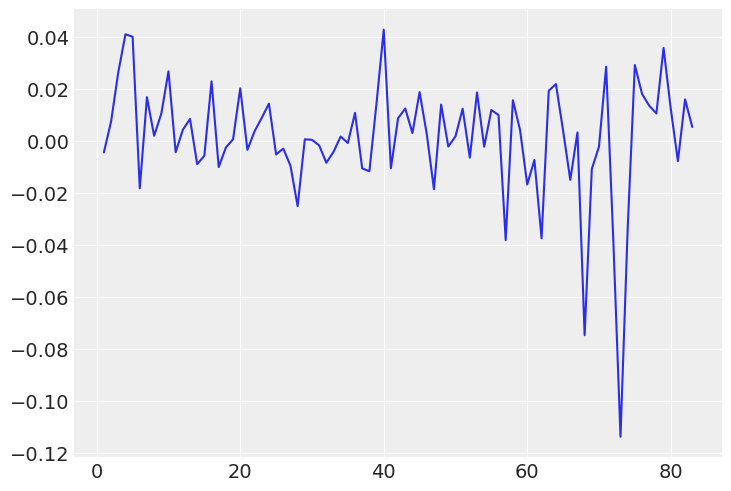

In [47]:
plt.plot(data['World_oil_prod'])
plt.show()

In [48]:
import pymc as pm
import arviz as az
az.style.use("arviz-darkgrid")
seed = sum(map(ord, "PyMC LABS - BVAR"))
rng = np.random.default_rng(seed=seed)

In [49]:
train_data = data[:60]
test_data = data[60:]
train_data.shape, test_data.shape

((60, 10), (23, 10))

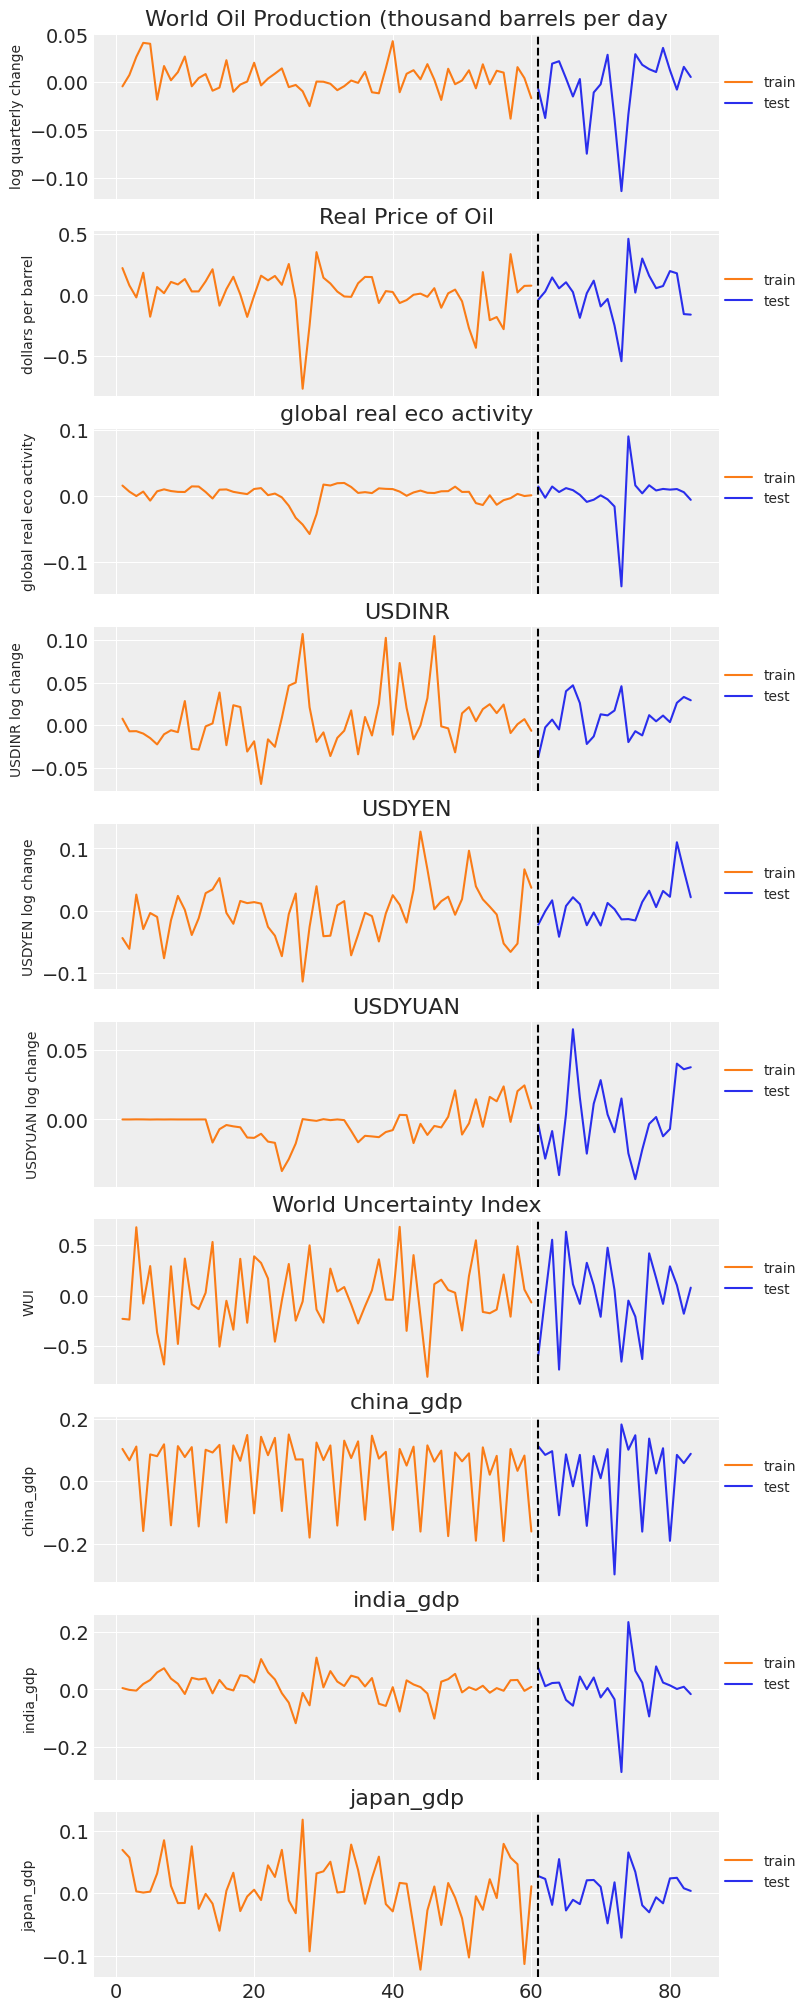

In [52]:
_, ax = plt.subplots(10, 1, figsize=(8, 20), sharex=True)
ax[0].plot(train_data[train_data.columns[0]], color="C1", label="train")
ax[0].plot(test_data[test_data.columns[0]], color="C0", label="test")
ax[0].set_ylabel("log quarterly change", fontsize=10)
ax[0].set_title("World Oil Production (thousand barrels per day")

ax[1].plot(train_data[train_data.columns[1]], color="C1", label="train")
ax[1].plot(test_data[test_data.columns[1]], color="C0", label="test")
ax[1].set_ylabel("dollars per barrel", fontsize=10)
ax[1].set_title("Real Price of Oil")

ax[2].plot(train_data[train_data.columns[2]], color="C1", label="train")
ax[2].plot(test_data[test_data.columns[2]], color="C0", label="test")
ax[2].set_ylabel("global real eco activity", fontsize=10)
ax[2].set_title("global real eco activity")

ax[3].plot(train_data[train_data.columns[3]], color="C1", label="train")
ax[3].plot(test_data[test_data.columns[3]], color="C0", label="test")
ax[3].set_ylabel("USDINR log change", fontsize=10)
ax[3].set_title("USDINR")

ax[4].plot(train_data[train_data.columns[4]], color="C1", label="train")
ax[4].plot(test_data[test_data.columns[4]], color="C0", label="test")
ax[4].set_ylabel("USDYEN log change", fontsize=10)
ax[4].set_title("USDYEN")

ax[5].plot(train_data[train_data.columns[5]], color="C1", label="train")
ax[5].plot(test_data[test_data.columns[5]], color="C0", label="test")
ax[5].set_ylabel("USDYUAN log change", fontsize=10)
ax[5].set_title("USDYUAN")

ax[6].plot(train_data[train_data.columns[6]], color="C1", label="train")
ax[6].plot(test_data[test_data.columns[6]], color="C0", label="test")
ax[6].set_ylabel("WUI", fontsize=10)
ax[6].set_title("World Uncertainty Index")

ax[7].plot(train_data[train_data.columns[7]], color="C1", label="train")
ax[7].plot(test_data[test_data.columns[7]], color="C0", label="test")
ax[7].set_ylabel("china_gdp", fontsize=10)
ax[7].set_title("china_gdp")

ax[8].plot(train_data[train_data.columns[8]], color="C1", label="train")
ax[8].plot(test_data[test_data.columns[8]], color="C0", label="test")
ax[8].set_ylabel("india_gdp", fontsize=10)
ax[8].set_title("india_gdp")

ax[9].plot(train_data[train_data.columns[9]], color="C1", label="train")
ax[9].plot(test_data[test_data.columns[9]], color="C0", label="test")
ax[9].set_ylabel("japan_gdp", fontsize=10)
ax[9].set_title("japan_gdp")
for axi in ax:
    axi.axvline(data.index[60], ls="--", color="k")
    axi.legend(loc=(1, 0.5), fontsize=10)

In [53]:
data.columns

Index(['World_oil_prod', 'Real_price_oil', 'glob_eco_act', 'usdinr', 'usdyen',
       'usdyuan', 'wui', 'china_gdp', 'india_gdp', 'japan_gdp'],
      dtype='object')

In [54]:
lags = 4

coords={
    "lags": reversed(range(-lags, 0)),
    "vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdinr',
       'usdyen', 'usdyuan', 'wui', 'china_gdp', 'india_gdp', 'japan_gdp'),
    "cross_vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdinr',
       'usdyen', 'usdyuan', 'wui', 'china_gdp', 'india_gdp', 'japan_gdp'),
    "time": range(len(train_data) - lags),
}

with pm.Model(coords=coords) as BVAR_model:
    # The first B bit:
    # Priors for the model intercept, lagged coefficients and noise terms
    intercept = pm.Normal("intercept", mu=0, sigma=0.1, dims=("vars",))
    lag_coefs = pm.Normal("lag_coefs", mu=0, sigma=0.1, dims=("lags", "vars", "cross_vars"))
    noise = pm.HalfNormal("noise", dims=("vars",))

    # The VAR bit:
    # Compute autoregressive expectation for each variable
    # We convolve the lagged coefficients of each variable with the whole dataset
    ar_oilprod= pm.math.sum([
        pm.math.sum(lag_coefs[i, 0] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)        
    ar_realprice = pm.math.sum([
        pm.math.sum(lag_coefs[i, 1] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)   
    ar_ecoact = pm.math.sum([
        pm.math.sum(lag_coefs[i, 2] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_usdinr = pm.math.sum([
        pm.math.sum(lag_coefs[i, 3] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_usdyen = pm.math.sum([
        pm.math.sum(lag_coefs[i, 4] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_usdyuan = pm.math.sum([
        pm.math.sum(lag_coefs[i, 5] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_wui = pm.math.sum([
        pm.math.sum(lag_coefs[i, 6] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_chinagdp = pm.math.sum([
        pm.math.sum(lag_coefs[i, 7] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_indiagdp = pm.math.sum([
        pm.math.sum(lag_coefs[i, 8] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_japangdp = pm.math.sum([
        pm.math.sum(lag_coefs[i, 9] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    # Stack autoregressive terms and add intercepts
    mean = intercept + pm.math.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdinr, ar_usdyen, ar_usdyuan, ar_wui, ar_chinagdp, ar_indiagdp, ar_japangdp], axis=-1)

    # The second B bit:
    # For modelling simplicity, we ignore the first observations, where we could
    # not observe the effects of all the lagged coefficients
    obs = pm.Normal("obs", mu=mean, sigma=noise, observed=train_data[lags:], dims=("time", "vars"))

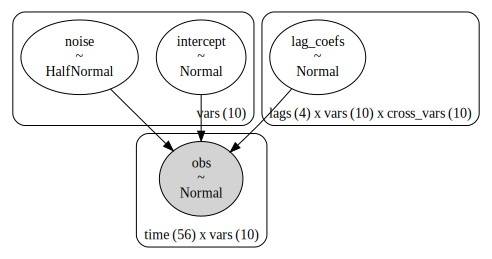

In [55]:
pm.model_to_graphviz(BVAR_model)

In [56]:
with BVAR_model:
    trace = pm.sample(chains=2, random_seed=100)

array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'lag_coefs'}>,
        <Axes: title={'center': 'lag_coefs'}>],
       [<Axes: title={'center': 'noise'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

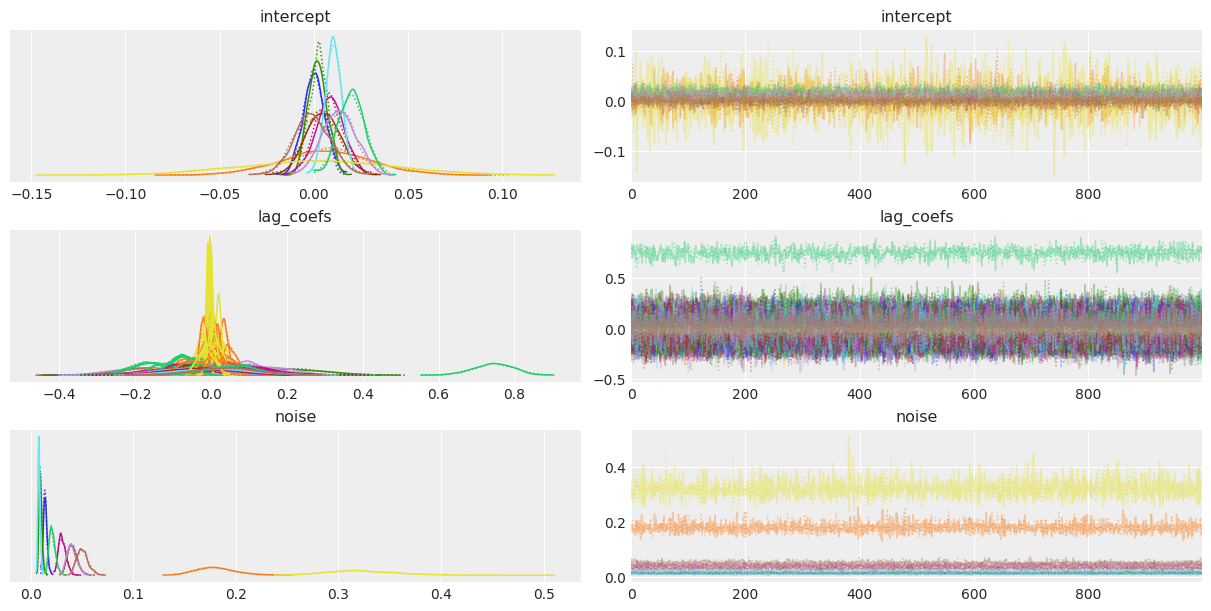

In [57]:
az.plot_trace(trace)

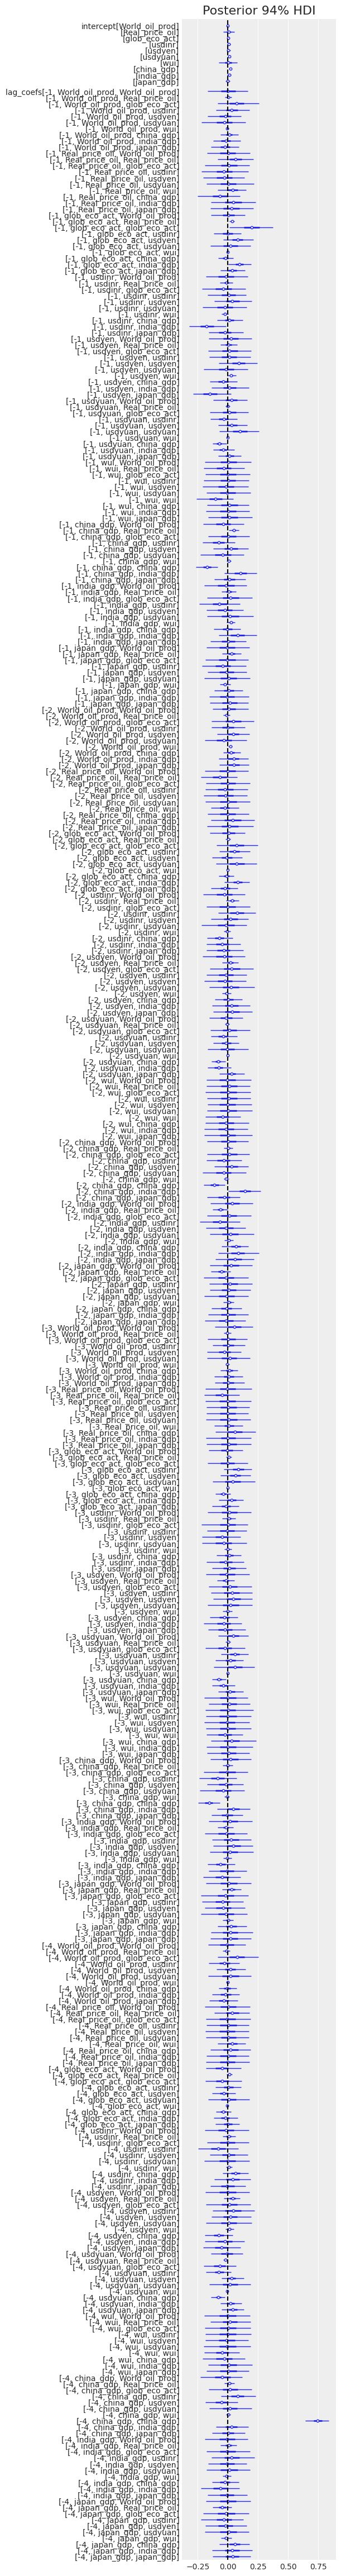

In [58]:
az.plot_forest(trace, var_names=["intercept", "lag_coefs"], combined=True, textsize=10)
plt.axvline(0, color="k", ls="--")
plt.title("Posterior 94% HDI");

In [60]:
(az.summary(trace)).to_csv("/content/drive/MyDrive/ae/summary.csv")

In [64]:
# Take a random subset of 100 draws from the posterior
draws = rng.integers(1000, size=100)

post = trace.posterior.stack(sample=("chain", "draw"))
intercept_draws = post["intercept"].values.T[draws]

lag_coefs_draws = post["lag_coefs"].values.T[draws].T
lag_coefs_draws = np.moveaxis(lag_coefs_draws, -1, 0)

noise_draws = post["noise"].values.T[draws]

intercept_draws.shape, lag_coefs_draws.shape, noise_draws.shape

((100, 10), (100, 4, 10, 10), (100, 10))

In [67]:
# Function that takes a single draw of parameters and forecasts n steps
def _forecast(intercept, lag_coefs, noise, forecast=24):
  
    len_data = len(train_data)
    new_draws = np.zeros((train_data.shape[0]+forecast, train_data.shape[1]))
    # Fill the new array with the observed data
    new_draws[:len_data] = train_data[:]
    for i in range(forecast):
        ar_oilprod = np.sum(lag_coefs[:, 0] * new_draws[len_data+i-lags: len_data+i])
        ar_realprice = np.sum(lag_coefs[:, 1] * new_draws[len_data+i-lags: len_data+i])
        ar_ecoact = np.sum(lag_coefs[:, 2] * new_draws[len_data+i-lags: len_data+i])
        ar_usdinr = np.sum(lag_coefs[:, 3] * new_draws[len_data+i-lags: len_data+i])
        ar_usdyen = np.sum(lag_coefs[:, 4] * new_draws[len_data+i-lags: len_data+i])
        ar_usdyuan = np.sum(lag_coefs[:, 5] * new_draws[len_data+i-lags: len_data+i])
        ar_wui = np.sum(lag_coefs[:, 6] * new_draws[len_data+i-lags: len_data+i])
        ar_chinagdp = np.sum(lag_coefs[:, 7] * new_draws[len_data+i-lags: len_data+i])
        ar_indiagdp = np.sum(lag_coefs[:, 8] * new_draws[len_data+i-lags: len_data+i])
        ar_japangdp = np.sum(lag_coefs[:, 9] * new_draws[len_data+i-lags: len_data+i])
        mean = intercept + np.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdinr, ar_usdyen, ar_usdyuan, ar_wui, ar_chinagdp,ar_indiagdp, ar_japangdp])
        new_draws[len_data+i] = rng.normal(mean, noise)
    # Replace all observed data with nan, so they don't show when we plot it
    new_draws[:-forecast-1] = np.nan
    
    return new_draws

# Vectorized forecast function to handle multiple parameter draws
forecast = np.vectorize(
    _forecast,
    signature=("(v),(l,v,v),(v)->(o,v)"),
    excluded=("forecast",),
)

In [68]:
# Forecast 23 quarters into the future
ppc_draws = forecast(intercept_draws, lag_coefs_draws, noise_draws, forecast=23)
ppc_draws = np.swapaxes(ppc_draws, 0, 1)
ppc_draws.shape


(83, 100, 10)

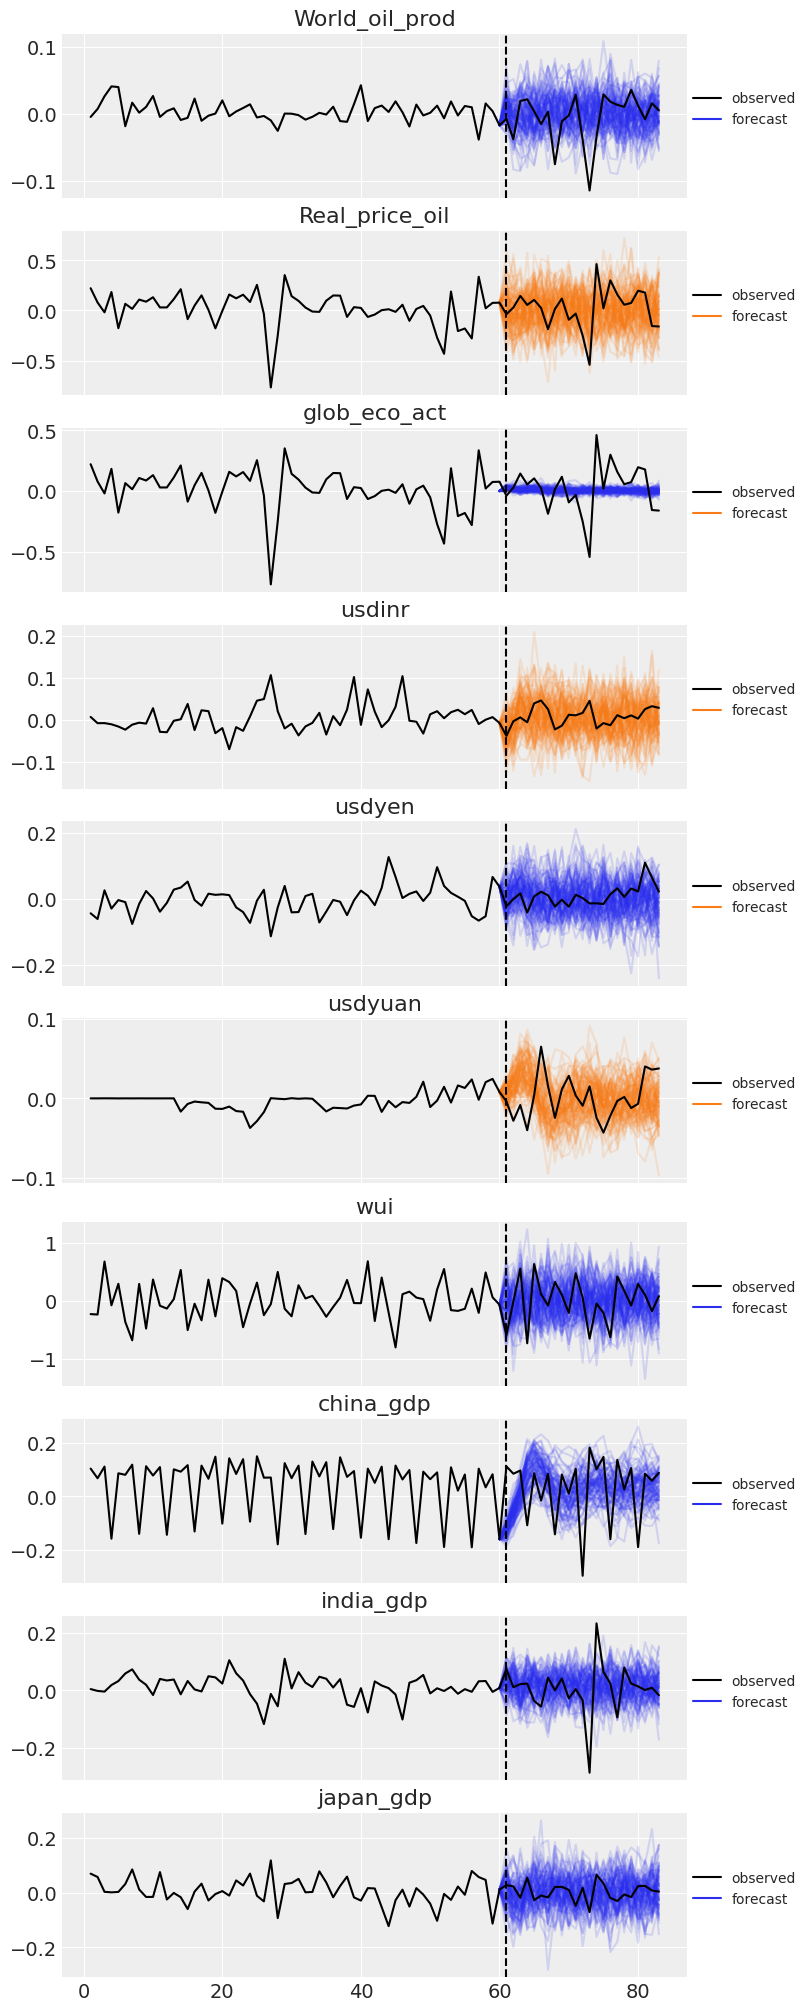

In [71]:
_, ax = plt.subplots(10, 1, sharex=True, figsize = (8,20))

ax[0].set_title('World_oil_prod')
ax[0].plot(data.index, ppc_draws[..., 0], color="C0", alpha=0.15)
ax[0].plot(data['World_oil_prod'], color="k", label="observed")
ax[0].plot([], color="C0", label="forecast")

ax[1].set_title('Real_price_oil')
ax[1].plot(data.index, ppc_draws[..., 1], color="C1", alpha=0.15)
ax[1].plot(data["Real_price_oil"], color="k", label="observed")
ax[1].plot([], color="C1", label="forecast")

ax[2].set_title('glob_eco_act')
ax[2].plot(data.index, ppc_draws[..., 2], color="C0", alpha=0.15)
ax[2].plot(data["Real_price_oil"], color="k", label="observed")
ax[2].plot([], color="C1", label="forecast")

ax[3].set_title('usdinr')
ax[3].plot(data.index, ppc_draws[..., 3], color="C1", alpha=0.15)
ax[3].plot(data["usdinr"], color="k", label="observed")
ax[3].plot([], color="C1", label="forecast")

ax[4].set_title('usdyen')
ax[4].plot(data.index, ppc_draws[..., 4], color="C0", alpha=0.15)
ax[4].plot(data["usdyen"], color="k", label="observed")
ax[4].plot([], color="C1", label="forecast")

ax[5].set_title('usdyuan')
ax[5].plot(data.index, ppc_draws[..., 5], color="C1", alpha=0.15)
ax[5].plot(data["usdyuan"], color="k", label="observed")
ax[5].plot([], color="C1", label="forecast")

ax[6].set_title('wui')
ax[6].plot(data.index, ppc_draws[..., 6], color="C0", alpha=0.15)
ax[6].plot(data["wui"], color="k", label="observed")
ax[6].plot([], color="C0", label="forecast")

ax[7].set_title('china_gdp')
ax[7].plot(data.index, ppc_draws[..., 7], color="C0", alpha=0.15)
ax[7].plot(data["china_gdp"], color="k", label="observed")
ax[7].plot([], color="C0", label="forecast")

ax[8].set_title('india_gdp')
ax[8].plot(data.index, ppc_draws[..., 8], color="C0", alpha=0.15)
ax[8].plot(data["india_gdp"], color="k", label="observed")
ax[8].plot([], color="C0", label="forecast")

ax[9].set_title('japan_gdp')
ax[9].plot(data.index, ppc_draws[..., 9], color="C0", alpha=0.15)
ax[9].plot(data["japan_gdp"], color="k", label="observed")
ax[9].plot([], color="C0", label="forecast")
for axi in ax:
    axi.axvline(test_data.index[0], ls="--", color="k")
    axi.legend(fontsize=10, loc=(1, .4))